<a href="https://colab.research.google.com/github/BuiDaoGiaHuy/something/blob/master/conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
def conv(I,F,S=1):
  H,W=I.shape[:2]
  f=F.shape[0]
  F=F.reshape((f,f,1))
  P=int(((H-1)*S-H+f)/2)
  I_pad=np.pad(I, ((P,),(P,),(0,)),'constant', constant_values=0)
  I_res=np.zeros((H, W, 3))
  for h in range(H):
    for w in range(W):
      for i in range(f):
        for j in range(f):
          I_res[h,w]+=I_pad[h*S+i,w*S+j]*F[-1-i][-1-j]
  return I_res

In [3]:
dx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float64)
dy=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float64)

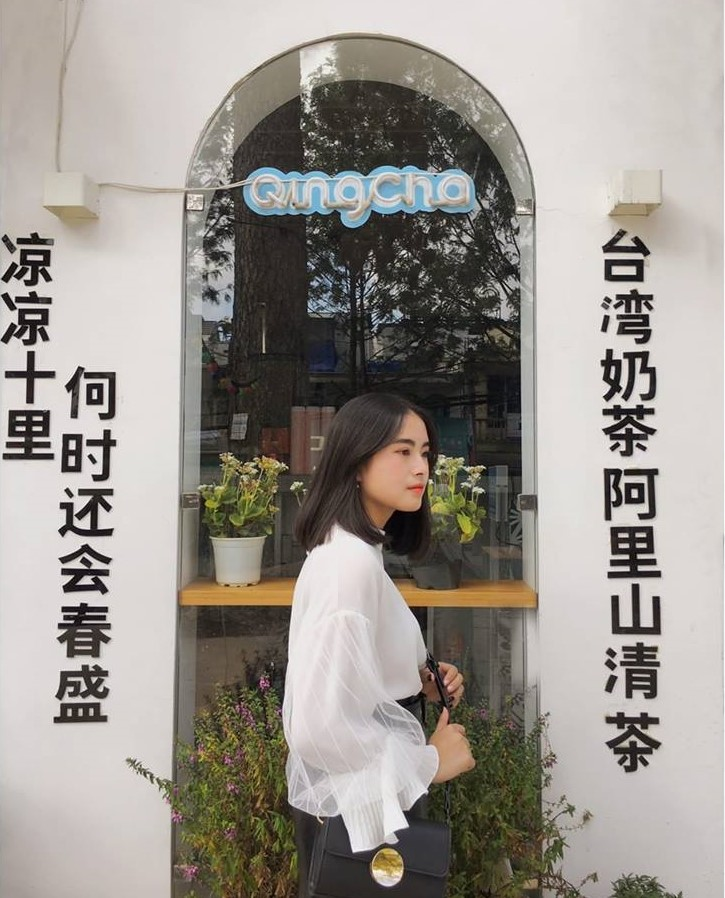

In [8]:
img=cv2.imread('/content/uuiui.jpg')
cv2_imshow(img)

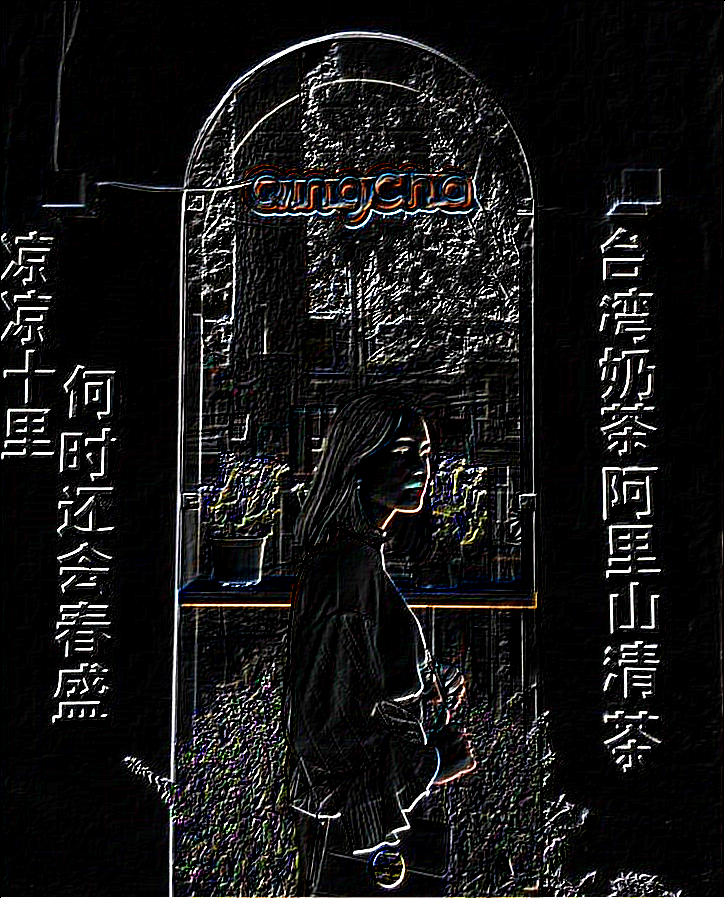

In [10]:
cv2_imshow(conv(img,dx)+conv(img,dy))